In [3]:
#Compréhension des données du dataset traité

import pandas

#Importation du dataset
df = pandas.read_csv('movie_dataset_cleaned_final.csv')

#Affichage des attributs du dataset
print('attributes in the dataset: ', df.columns.tolist())

#Affichage du nombre de lignes dans le dataset
print('Nombre de lignes dans le dataset: ', len(df))

attributes in the dataset:  ['budget', 'genres', 'original_language', 'popularity', 'production_companies', 'production_countries', 'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count', 'cast', 'director']
Nombre de lignes dans le dataset:  4803


In [6]:
#Affichage des 5 premières lignes du dataset
print('Les 5 premières lignes du dataset:')
print(df.head(5))

Les 5 premières lignes du dataset:
      budget                                    genres original_language  \
0  237000000  Action Adventure Fantasy Science Fiction                en   
1  300000000                  Adventure Fantasy Action                en   
2  245000000                    Action Adventure Crime                en   
3  250000000               Action Crime Drama Thriller                en   
4  260000000          Action Adventure Science Fiction                en   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   
1  139.082615  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  107.376788  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  112.312950  [{"name": "Legendary Pictures", "id": 923}, {"...   
4   43.926995        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries     revenue  runtime  \
0  [{"iso_3166_1": "US

Nombre de films avec données complètes: 4801

Statistiques des variables brutes:
             budget   popularity      runtime  vote_average    vote_count
count  4.801000e+03  4801.000000  4801.000000   4801.000000   4801.000000
mean   2.905402e+07    21.501089   106.875859      6.093189    690.503020
std    4.072821e+07    31.820361    22.611935      1.191493   1234.764044
min    0.000000e+00     0.000000     0.000000      0.000000      0.000000
25%    8.000000e+05     4.680206    94.000000      5.600000     54.000000
50%    1.500000e+07    12.928269   103.000000      6.200000    236.000000
75%    4.000000e+07    28.350529   118.000000      6.800000    737.000000
max    3.800000e+08   875.581305   338.000000     10.000000  13752.000000

Variables après normalisation 0-1:
            budget   popularity      runtime  vote_average   vote_count
count  4801.000000  4801.000000  4801.000000   4801.000000  4801.000000
mean      0.076458     0.024556     0.316201      0.609319     0.050211
s

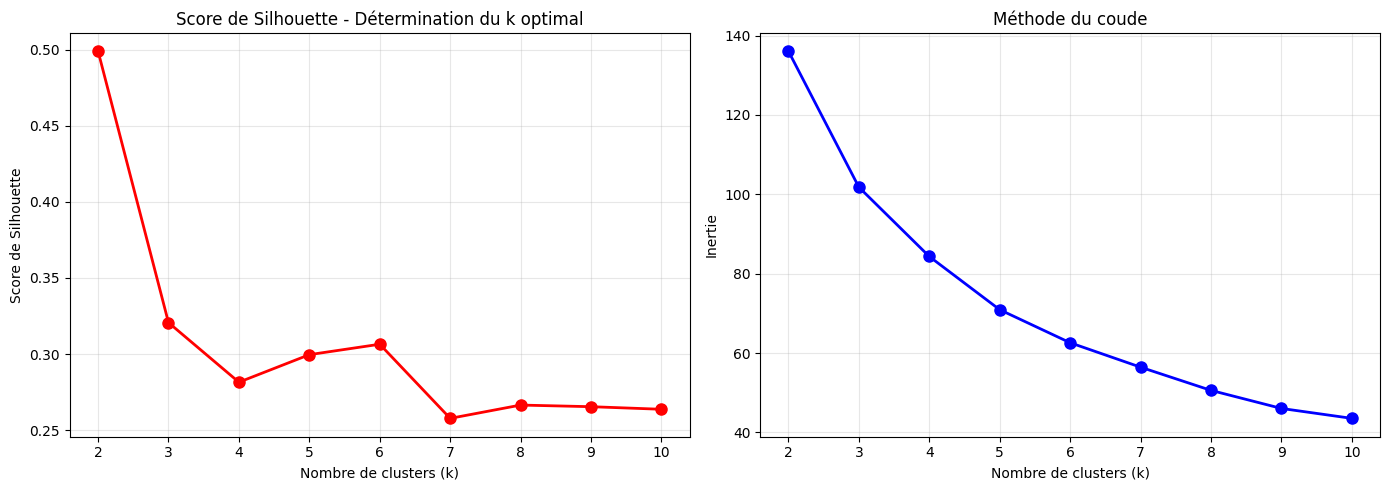


K OPTIMAL SELON LE SCORE DE SILHOUETTE: 2
Score de silhouette: 0.499


In [9]:
#Application de K-means avec score de silhouette et normalisation 0-1

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sélectionner les variables numériques (excluant revenue qui est notre variable cible)
numeric_cols = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

# Créer une copie du dataset avec les variables numériques, sans NaN
df_km = df[numeric_cols + ['revenue']].dropna()

print(f"Nombre de films avec données complètes: {len(df_km)}")
print(f"\nStatistiques des variables brutes:")
print(df_km[numeric_cols].describe())

# Normaliser les variables sur l'échelle 0-1 avec MinMaxScaler
scaler_01 = MinMaxScaler(feature_range=(0, 1))
X_normalized = scaler_01.fit_transform(df_km[numeric_cols])

# Créer un DataFrame avec les variables normalisées 0-1
df_normalized = pd.DataFrame(X_normalized, columns=numeric_cols, index=df_km.index)

print(f"\nVariables après normalisation 0-1:")
print(df_normalized.describe())

# Trouver le nombre optimal de clusters avec le score de silhouette
silhouette_scores = []
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_normalized)
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertias.append(kmeans.inertia_)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.3f}, Inertie = {kmeans.inertia_:.2f}")

# Afficher les graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de clusters (k)')
axes[0].set_ylabel('Score de Silhouette')
axes[0].set_title('Score de Silhouette - Détermination du k optimal')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de clusters (k)')
axes[1].set_ylabel('Inertie')
axes[1].set_title('Méthode du coude')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sélectionner le k optimal (celui avec le meilleur score de silhouette)
k_optimal = K_range[np.argmax(silhouette_scores)]
print(f"\n{'='*60}")
print(f"K OPTIMAL SELON LE SCORE DE SILHOUETTE: {k_optimal}")
print(f"Score de silhouette: {max(silhouette_scores):.3f}")
print(f"{'='*60}")

ANALYSE DU REVENUE PAR CLUSTER

--- CLUSTER 0 (584 films) ---
Revenue moyen: $373,727,663
Revenue médian: $295,021,198
Score Combiné moyen: 0.324
Revenue normalisé moyen: 0.134

--- CLUSTER 1 (4217 films) ---
Revenue moyen: $41,935,236
Revenue médian: $10,903,846
Score Combiné moyen: 0.200
Revenue normalisé moyen: 0.015


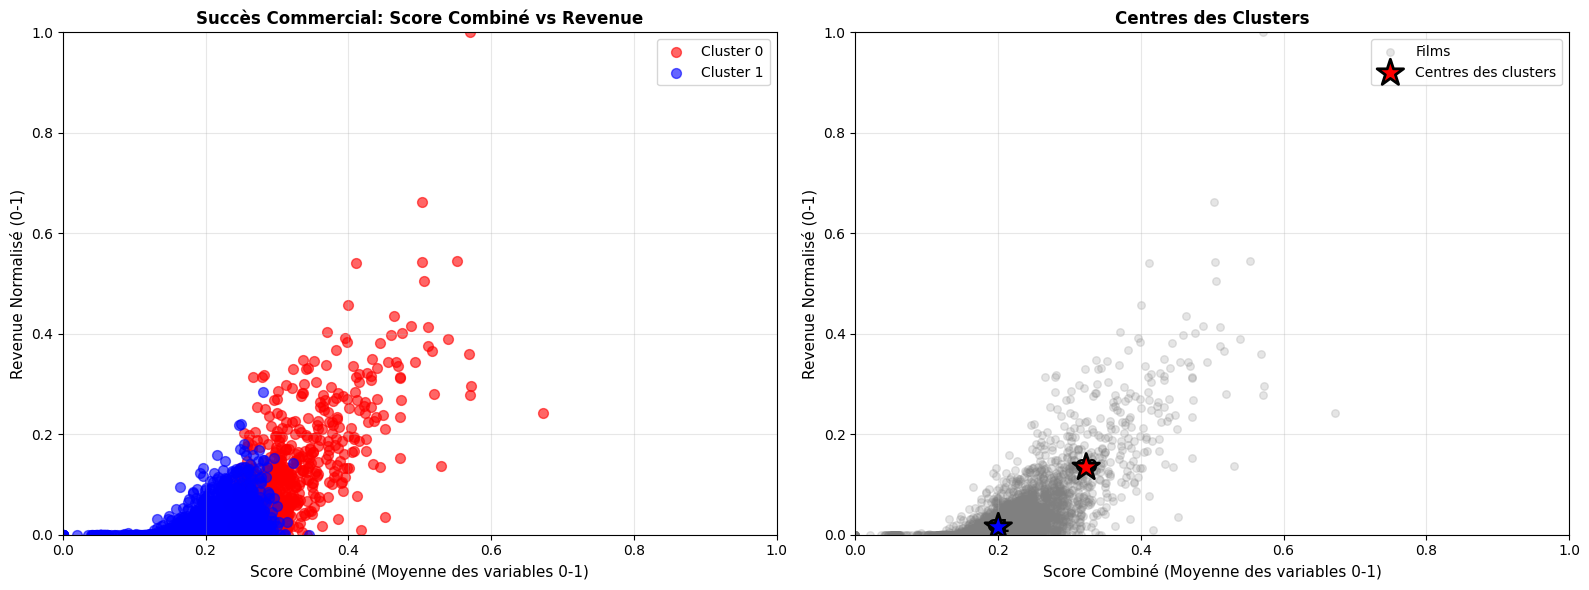


COORDONNÉES NORMALISÉES (0-1) DES CENTRES DES CLUSTERS
Cluster 0: X=0.324, Y=0.134
Cluster 1: X=0.200, Y=0.015


In [10]:
#Application K-means avec coordonnées normalisées (0-1) et revenue comme repère

# Appliquer K-means avec k optimal
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_km['Cluster'] = kmeans.fit_predict(X_normalized)

# Créer un score combiné (moyenne de toutes les variables normalisées)
df_km['Score_Combine'] = df_normalized.mean(axis=1)

# Normaliser aussi le revenue sur l'échelle 0-1
scaler_revenue = MinMaxScaler(feature_range=(0, 1))
df_km['Revenue_Normalized'] = scaler_revenue.fit_transform(df_km[['revenue']])

print("="*60)
print("ANALYSE DU REVENUE PAR CLUSTER")
print("="*60)

for cluster in range(k_optimal):
    cluster_data = df_km[df_km['Cluster'] == cluster]
    print(f"\n--- CLUSTER {cluster} ({len(cluster_data)} films) ---")
    print(f"Revenue moyen: ${cluster_data['revenue'].mean():,.0f}")
    print(f"Revenue médian: ${cluster_data['revenue'].median():,.0f}")
    print(f"Score Combiné moyen: {cluster_data['Score_Combine'].mean():.3f}")
    print(f"Revenue normalisé moyen: {cluster_data['Revenue_Normalized'].mean():.3f}")

# GRAPHIQUE PRINCIPAL: Score Combiné (X) vs Revenue Normalisé (Y), coloré par Cluster
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Tous les points colorés par cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster in range(k_optimal):
    cluster_data = df_km[df_km['Cluster'] == cluster]
    axes[0].scatter(cluster_data['Score_Combine'], 
                    cluster_data['Revenue_Normalized'],
                    label=f'Cluster {cluster}', 
                    s=50, alpha=0.6, c=colors[cluster % len(colors)])

axes[0].set_xlabel('Score Combiné (Moyenne des variables 0-1)', fontsize=11)
axes[0].set_ylabel('Revenue Normalisé (0-1)', fontsize=11)
axes[0].set_title('Succès Commercial: Score Combiné vs Revenue', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Graphique 2: Centres des clusters
centers_scores = []
centers_revenue = []
for cluster in range(k_optimal):
    cluster_data = df_km[df_km['Cluster'] == cluster]
    centers_scores.append(cluster_data['Score_Combine'].mean())
    centers_revenue.append(cluster_data['Revenue_Normalized'].mean())

# Afficher tous les points en gris clair
axes[1].scatter(df_km['Score_Combine'], 
                df_km['Revenue_Normalized'],
                s=30, alpha=0.2, c='gray', label='Films')

# Afficher les centres des clusters en gros
axes[1].scatter(centers_scores, centers_revenue, 
                s=400, marker='*', c=colors[:k_optimal], 
                edgecolors='black', linewidth=2, label='Centres des clusters', zorder=5)

# Ajouter les labels des clusters au centre
for i, (x, y) in enumerate(zip(centers_scores, centers_revenue)):
    axes[1].annotate(f'C{i}', (x, y), fontsize=12, fontweight='bold', 
                     ha='center', va='center')

axes[1].set_xlabel('Score Combiné (Moyenne des variables 0-1)', fontsize=11)
axes[1].set_ylabel('Revenue Normalisé (0-1)', fontsize=11)
axes[1].set_title('Centres des Clusters', fontsize=12, fontweight='bold')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Afficher les coordonnées normalisées des centres
print("\n" + "="*60)
print("COORDONNÉES NORMALISÉES (0-1) DES CENTRES DES CLUSTERS")
print("="*60)
for i, (score, revenue) in enumerate(zip(centers_scores, centers_revenue)):
    print(f"Cluster {i}: X={score:.3f}, Y={revenue:.3f}")

ANALYSE DU SUCCÈS CRITIQUE
k=2: Silhouette Score = 0.640, Inertie = 69.86
k=2: Silhouette Score = 0.640, Inertie = 69.86
k=3: Silhouette Score = 0.442, Inertie = 53.69
k=3: Silhouette Score = 0.442, Inertie = 53.69
k=4: Silhouette Score = 0.401, Inertie = 46.31
k=4: Silhouette Score = 0.401, Inertie = 46.31
k=5: Silhouette Score = 0.349, Inertie = 39.66
k=5: Silhouette Score = 0.349, Inertie = 39.66
k=6: Silhouette Score = 0.374, Inertie = 33.83
k=6: Silhouette Score = 0.374, Inertie = 33.83
k=7: Silhouette Score = 0.395, Inertie = 30.84
k=7: Silhouette Score = 0.395, Inertie = 30.84
k=8: Silhouette Score = 0.340, Inertie = 28.12
k=8: Silhouette Score = 0.340, Inertie = 28.12
k=9: Silhouette Score = 0.333, Inertie = 25.86
k=9: Silhouette Score = 0.333, Inertie = 25.86
k=10: Silhouette Score = 0.336, Inertie = 23.56
k=10: Silhouette Score = 0.336, Inertie = 23.56


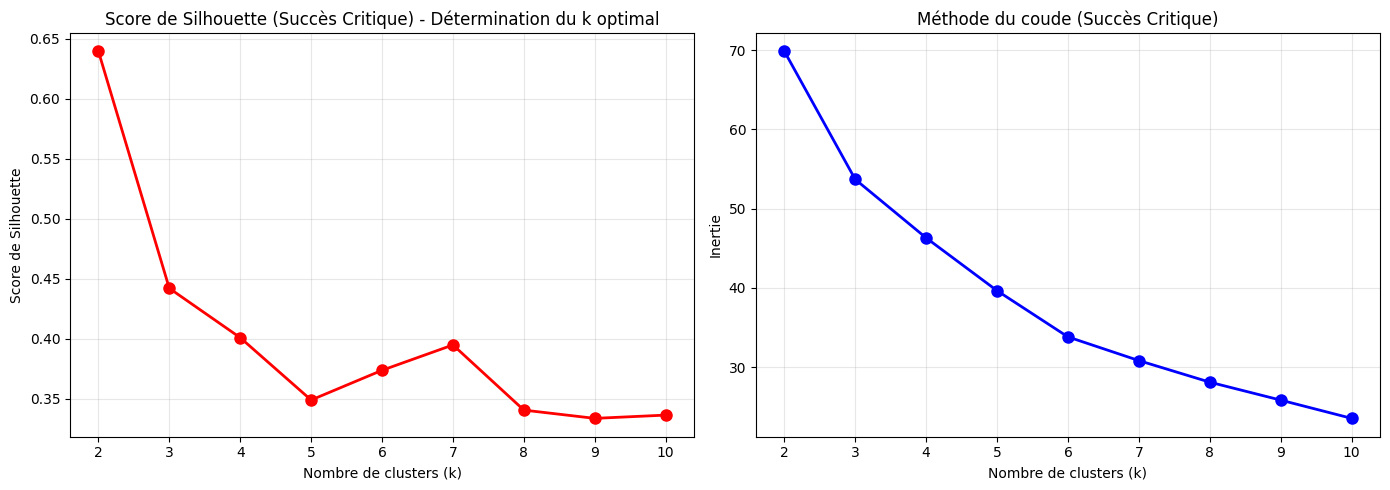


K OPTIMAL POUR LE SUCCÈS CRITIQUE: 2
Score de silhouette: 0.640

ANALYSE DU SUCCÈS CRITIQUE PAR CLUSTER

--- CLUSTER CRITIQUE 0 (4303 films) ---
Vote Average moyen: 6.03
Vote Average médian: 6.20
Score des autres variables moyen: 0.102
Vote Average normalisé moyen: 0.603

--- CLUSTER CRITIQUE 1 (498 films) ---
Vote Average moyen: 6.61
Vote Average médian: 6.60
Score des autres variables moyen: 0.246
Vote Average normalisé moyen: 0.661


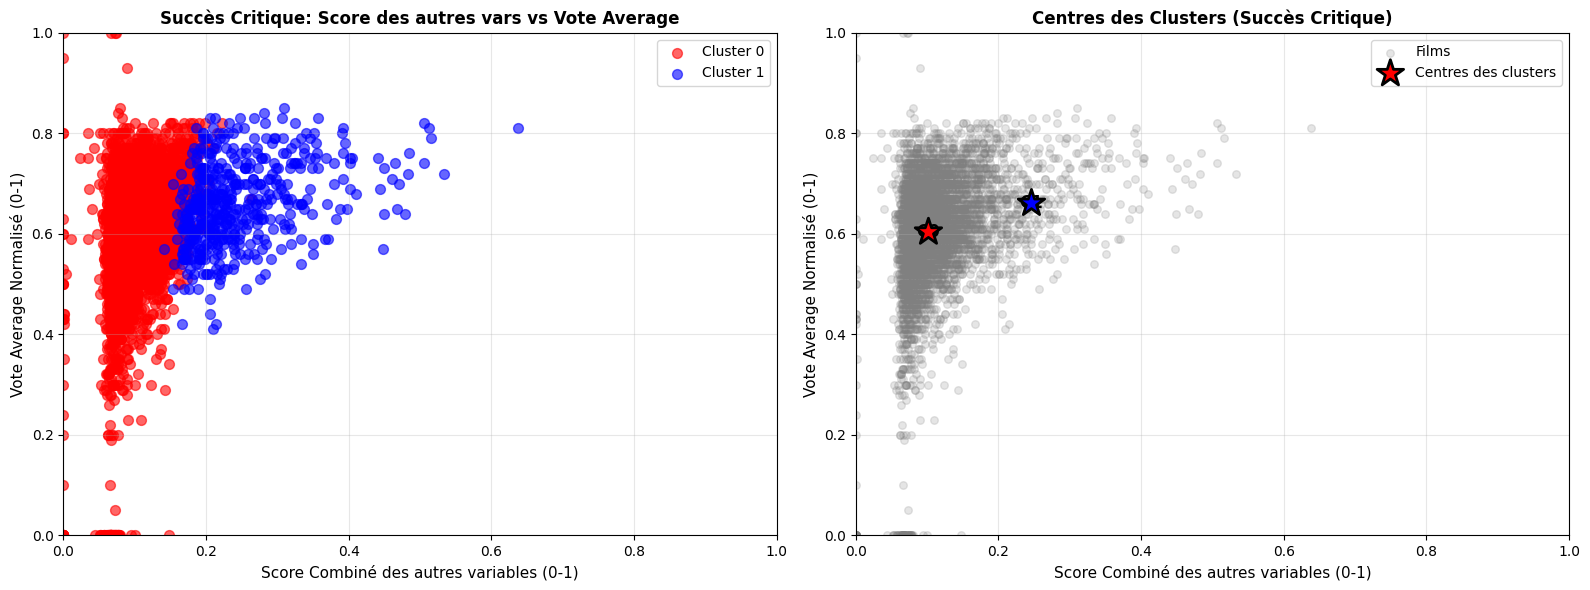


COORDONNÉES NORMALISÉES (0-1) DES CENTRES DES CLUSTERS (SUCCÈS CRITIQUE)
Cluster 0: X (autres vars)=0.102, Y (vote_average)=0.603
Cluster 1: X (autres vars)=0.246, Y (vote_average)=0.661


In [11]:
#Analyse du succès critique: vote_average vs score combiné des autres variables

# Variables pour le score critique (toutes sauf vote_average et revenue)
critical_vars = ['budget', 'popularity', 'runtime', 'vote_count']

# Normaliser les variables critiques sur 0-1
scaler_critical = MinMaxScaler(feature_range=(0, 1))
X_critical_normalized = scaler_critical.fit_transform(df_km[critical_vars])

df_critical_normalized = pd.DataFrame(X_critical_normalized, columns=critical_vars, index=df_km.index)

# Score combiné des variables critiques (sans vote_average)
df_km['Score_Critical_Others'] = df_critical_normalized.mean(axis=1)

# Normaliser vote_average sur 0-1
scaler_vote = MinMaxScaler(feature_range=(0, 1))
df_km['Vote_Average_Normalized'] = scaler_vote.fit_transform(df_km[['vote_average']])

print("="*60)
print("ANALYSE DU SUCCÈS CRITIQUE")
print("="*60)

# Trouver le nombre optimal de clusters pour le succès critique avec score de silhouette
silhouette_scores_critical = []
inertias_critical = []
K_range_critical = range(2, 11)

for k in K_range_critical:
    kmeans_critical = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels_critical = kmeans_critical.fit_predict(X_critical_normalized)
    silhouette_avg_critical = silhouette_score(X_critical_normalized, cluster_labels_critical)
    silhouette_scores_critical.append(silhouette_avg_critical)
    inertias_critical.append(kmeans_critical.inertia_)
    print(f"k={k}: Silhouette Score = {silhouette_avg_critical:.3f}, Inertie = {kmeans_critical.inertia_:.2f}")

# Afficher les graphiques de sélection du k optimal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range_critical, silhouette_scores_critical, 'ro-', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de clusters (k)')
axes[0].set_ylabel('Score de Silhouette')
axes[0].set_title('Score de Silhouette (Succès Critique) - Détermination du k optimal')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range_critical, inertias_critical, 'bo-', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de clusters (k)')
axes[1].set_ylabel('Inertie')
axes[1].set_title('Méthode du coude (Succès Critique)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sélectionner le k optimal pour le succès critique
k_optimal_critical = K_range_critical[np.argmax(silhouette_scores_critical)]
print(f"\n{'='*60}")
print(f"K OPTIMAL POUR LE SUCCÈS CRITIQUE: {k_optimal_critical}")
print(f"Score de silhouette: {max(silhouette_scores_critical):.3f}")
print(f"{'='*60}")

# Appliquer K-means avec k optimal pour le succès critique
kmeans_critical = KMeans(n_clusters=k_optimal_critical, random_state=42, n_init=10)
df_km['Cluster_Critical'] = kmeans_critical.fit_predict(X_critical_normalized)

# Analyser les clusters par succès critique
print("\nANALYSE DU SUCCÈS CRITIQUE PAR CLUSTER")

for cluster in range(k_optimal_critical):
    cluster_data = df_km[df_km['Cluster_Critical'] == cluster]
    print(f"\n--- CLUSTER CRITIQUE {cluster} ({len(cluster_data)} films) ---")
    print(f"Vote Average moyen: {cluster_data['vote_average'].mean():.2f}")
    print(f"Vote Average médian: {cluster_data['vote_average'].median():.2f}")
    print(f"Score des autres variables moyen: {cluster_data['Score_Critical_Others'].mean():.3f}")
    print(f"Vote Average normalisé moyen: {cluster_data['Vote_Average_Normalized'].mean():.3f}")

# GRAPHIQUES: Score des autres variables (X) vs Vote Average Normalisé (Y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Tous les points colorés par cluster critique
colors_critical = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster in range(k_optimal_critical):
    cluster_data = df_km[df_km['Cluster_Critical'] == cluster]
    axes[0].scatter(cluster_data['Score_Critical_Others'], 
                    cluster_data['Vote_Average_Normalized'],
                    label=f'Cluster {cluster}', 
                    s=50, alpha=0.6, c=colors_critical[cluster % len(colors_critical)])

axes[0].set_xlabel('Score Combiné des autres variables (0-1)', fontsize=11)
axes[0].set_ylabel('Vote Average Normalisé (0-1)', fontsize=11)
axes[0].set_title('Succès Critique: Score des autres vars vs Vote Average', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Graphique 2: Centres des clusters critiques
centers_critical_others = []
centers_vote_avg = []
for cluster in range(k_optimal_critical):
    cluster_data = df_km[df_km['Cluster_Critical'] == cluster]
    centers_critical_others.append(cluster_data['Score_Critical_Others'].mean())
    centers_vote_avg.append(cluster_data['Vote_Average_Normalized'].mean())

# Afficher tous les points en gris clair
axes[1].scatter(df_km['Score_Critical_Others'], 
                df_km['Vote_Average_Normalized'],
                s=30, alpha=0.2, c='gray', label='Films')

# Afficher les centres des clusters en gros
axes[1].scatter(centers_critical_others, centers_vote_avg, 
                s=400, marker='*', c=colors_critical[:k_optimal_critical], 
                edgecolors='black', linewidth=2, label='Centres des clusters', zorder=5)

# Ajouter les labels des clusters au centre
for i, (x, y) in enumerate(zip(centers_critical_others, centers_vote_avg)):
    axes[1].annotate(f'C{i}', (x, y), fontsize=12, fontweight='bold', 
                     ha='center', va='center')

axes[1].set_xlabel('Score Combiné des autres variables (0-1)', fontsize=11)
axes[1].set_ylabel('Vote Average Normalisé (0-1)', fontsize=11)
axes[1].set_title('Centres des Clusters (Succès Critique)', fontsize=12, fontweight='bold')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Afficher les coordonnées normalisées des centres
print("\n" + "="*60)
print("COORDONNÉES NORMALISÉES (0-1) DES CENTRES DES CLUSTERS (SUCCÈS CRITIQUE)")
print("="*60)
for i, (others, vote) in enumerate(zip(centers_critical_others, centers_vote_avg)):
    print(f"Cluster {i}: X (autres vars)={others:.3f}, Y (vote_average)={vote:.3f}")

In [14]:
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, pairwise_distances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Données ----
df = pd.read_csv("movie_dataset_cleaned_final.csv")
numeric_cols = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']
df_km = df[numeric_cols + ["revenue"]].dropna()

X = df_km[numeric_cols].values

# ---- Normalisation 0-1 ----
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# ---- Distance matrix (optionnelle pour inertie) ----
dist_matrix = pairwise_distances(X_norm, metric="euclidean")

# ---- Recherche du meilleur k ----
sil_scores = []
inertias = []
K_range = range(2, 11)

for k in K_range:
    # initialisation : prendre k points initiaux comme médoids
    initial_medoids = list(range(k))

    kmed = kmedoids(X_norm, initial_medoids)
    kmed.process()

    clusters = kmed.get_clusters()
    medoids = kmed.get_medoids()

    # Construire les labels
    labels = np.zeros(len(X_norm), dtype=int)
    for idx_cluster, points in enumerate(clusters):
        for p in points:
            labels[p] = idx_cluster

    # Score de silhouette
    sil = silhouette_score(X_norm, labels)
    sil_scores.append(sil)

    # Inertie = somme des distances point → médoid
    inertia = 0
    for idx_cluster, points in enumerate(clusters):
        medoid_idx = medoids[idx_cluster]
        inertia += np.sum(dist_matrix[points, medoid_idx])
    inertias.append(inertia)

    print(f"k={k}: silhouette={sil:.3f}, inertie={inertia:.2f}")

# ---- Choix du meilleur k ----
k_opt = K_range[np.argmax(sil_scores)]
print("\n>>> k optimal =", k_opt)


k=2: silhouette=0.499, inertie=661.50
k=3: silhouette=0.342, inertie=581.32
k=3: silhouette=0.342, inertie=581.32
k=4: silhouette=0.317, inertie=528.00
k=4: silhouette=0.317, inertie=528.00
k=5: silhouette=0.300, inertie=491.45
k=5: silhouette=0.300, inertie=491.45
k=6: silhouette=0.283, inertie=457.13
k=6: silhouette=0.283, inertie=457.13
k=7: silhouette=0.288, inertie=439.40
k=7: silhouette=0.288, inertie=439.40
k=8: silhouette=0.248, inertie=417.15
k=8: silhouette=0.248, inertie=417.15
k=9: silhouette=0.263, inertie=397.79
k=9: silhouette=0.263, inertie=397.79
k=10: silhouette=0.232, inertie=385.96

>>> k optimal = 2
k=10: silhouette=0.232, inertie=385.96

>>> k optimal = 2


ANALYSE DU REVENUE PAR CLUSTER (K-medoids)

--- CLUSTER 0 (4223 films) ---
Revenue moyen: $41,779,328
Revenue médian: $10,959,475
Score Combiné moyen: 0.201
Revenue normalisé moyen: 0.015

--- CLUSTER 1 (578 films) ---
Revenue moyen: $378,310,976
Revenue médian: $299,752,726
Score Combiné moyen: 0.322
Revenue normalisé moyen: 0.136


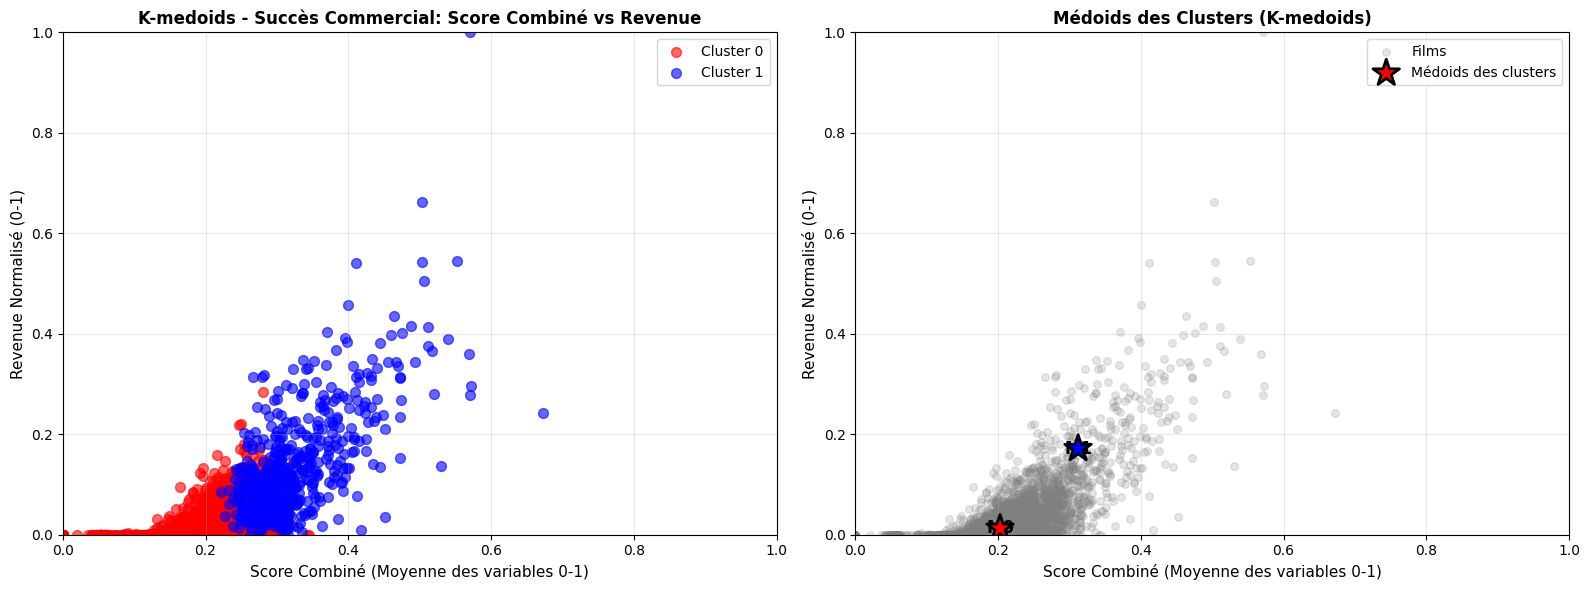


COORDONNÉES NORMALISÉES (0-1) DES MÉDOIDS DES CLUSTERS (K-medoids)
Médoid 0: X=0.203, Y=0.013
Médoid 1: X=0.312, Y=0.172


In [16]:
#Application K-medoids avec coordonnées normalisées (0-1) et revenue comme repère

# Réappliquer K-medoids avec k optimal
initial_medoids = list(range(k_opt))
kmed_final = kmedoids(X_norm, initial_medoids)
kmed_final.process()

clusters_final = kmed_final.get_clusters()
medoids_final = kmed_final.get_medoids()

# Construire les labels
df_kmedoids['Cluster'] = np.zeros(len(df_kmedoids), dtype=int)
for idx_cluster, points in enumerate(clusters_final):
    for p in points:
        df_kmedoids.iloc[p, df_kmedoids.columns.get_loc('Cluster')] = idx_cluster

# Créer un score combiné (moyenne de toutes les variables normalisées)
df_kmedoids['Score_Combine'] = pd.DataFrame(X_norm, columns=numeric_cols, index=df_kmedoids.index).mean(axis=1)

# Normaliser aussi le revenue sur l'échelle 0-1
scaler_revenue_kmedoids = MinMaxScaler(feature_range=(0, 1))
df_kmedoids['Revenue_Normalized'] = scaler_revenue_kmedoids.fit_transform(df_kmedoids[['revenue']])

print("="*60)
print("ANALYSE DU REVENUE PAR CLUSTER (K-medoids)")
print("="*60)

for cluster in range(k_opt):
    cluster_data = df_kmedoids[df_kmedoids['Cluster'] == cluster]
    print(f"\n--- CLUSTER {cluster} ({len(cluster_data)} films) ---")
    print(f"Revenue moyen: ${cluster_data['revenue'].mean():,.0f}")
    print(f"Revenue médian: ${cluster_data['revenue'].median():,.0f}")
    print(f"Score Combiné moyen: {cluster_data['Score_Combine'].mean():.3f}")
    print(f"Revenue normalisé moyen: {cluster_data['Revenue_Normalized'].mean():.3f}")

# GRAPHIQUE PRINCIPAL: Score Combiné (X) vs Revenue Normalisé (Y), coloré par Cluster
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Tous les points colorés par cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster in range(k_opt):
    cluster_data = df_kmedoids[df_kmedoids['Cluster'] == cluster]
    axes[0].scatter(cluster_data['Score_Combine'], 
                    cluster_data['Revenue_Normalized'],
                    label=f'Cluster {cluster}', 
                    s=50, alpha=0.6, c=colors[cluster % len(colors)])

axes[0].set_xlabel('Score Combiné (Moyenne des variables 0-1)', fontsize=11)
axes[0].set_ylabel('Revenue Normalisé (0-1)', fontsize=11)
axes[0].set_title('K-medoids - Succès Commercial: Score Combiné vs Revenue', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Graphique 2: Médoids des clusters
medoids_scores = []
medoids_revenue = []

for medoid_idx in medoids_final:
    medoids_scores.append(df_kmedoids.iloc[medoid_idx]['Score_Combine'])
    medoids_revenue.append(df_kmedoids.iloc[medoid_idx]['Revenue_Normalized'])

# Afficher tous les points en gris clair
axes[1].scatter(df_kmedoids['Score_Combine'], 
                df_kmedoids['Revenue_Normalized'],
                s=30, alpha=0.2, c='gray', label='Films')

# Afficher les médoids des clusters en gros
axes[1].scatter(medoids_scores, medoids_revenue, 
                s=400, marker='*', c=colors[:k_opt], 
                edgecolors='black', linewidth=2, label='Médoids des clusters', zorder=5)

# Ajouter les labels des clusters au médoid
for i, (x, y) in enumerate(zip(medoids_scores, medoids_revenue)):
    axes[1].annotate(f'M{i}', (x, y), fontsize=12, fontweight='bold', 
                     ha='center', va='center')

axes[1].set_xlabel('Score Combiné (Moyenne des variables 0-1)', fontsize=11)
axes[1].set_ylabel('Revenue Normalisé (0-1)', fontsize=11)
axes[1].set_title('Médoids des Clusters (K-medoids)', fontsize=12, fontweight='bold')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Afficher les coordonnées normalisées des médoids
print("\n" + "="*60)
print("COORDONNÉES NORMALISÉES (0-1) DES MÉDOIDS DES CLUSTERS (K-medoids)")
print("="*60)
for i, (score, revenue) in enumerate(zip(medoids_scores, medoids_revenue)):
    print(f"Médoid {i}: X={score:.3f}, Y={revenue:.3f}")


ANALYSE DU SUCCÈS CRITIQUE (K-medoids)
k=2: Silhouette Score = 0.624, Inertie = 455.47
k=2: Silhouette Score = 0.624, Inertie = 455.47
k=3: Silhouette Score = 0.448, Inertie = 388.23
k=3: Silhouette Score = 0.448, Inertie = 388.23
k=4: Silhouette Score = 0.373, Inertie = 359.77
k=4: Silhouette Score = 0.373, Inertie = 359.77
k=5: Silhouette Score = 0.347, Inertie = 344.49
k=5: Silhouette Score = 0.347, Inertie = 344.49
k=6: Silhouette Score = 0.382, Inertie = 314.48
k=6: Silhouette Score = 0.382, Inertie = 314.48
k=7: Silhouette Score = 0.320, Inertie = 291.08
k=7: Silhouette Score = 0.320, Inertie = 291.08
k=8: Silhouette Score = 0.334, Inertie = 283.35
k=8: Silhouette Score = 0.334, Inertie = 283.35
k=9: Silhouette Score = 0.330, Inertie = 276.19
k=9: Silhouette Score = 0.330, Inertie = 276.19
k=10: Silhouette Score = 0.317, Inertie = 267.23
k=10: Silhouette Score = 0.317, Inertie = 267.23


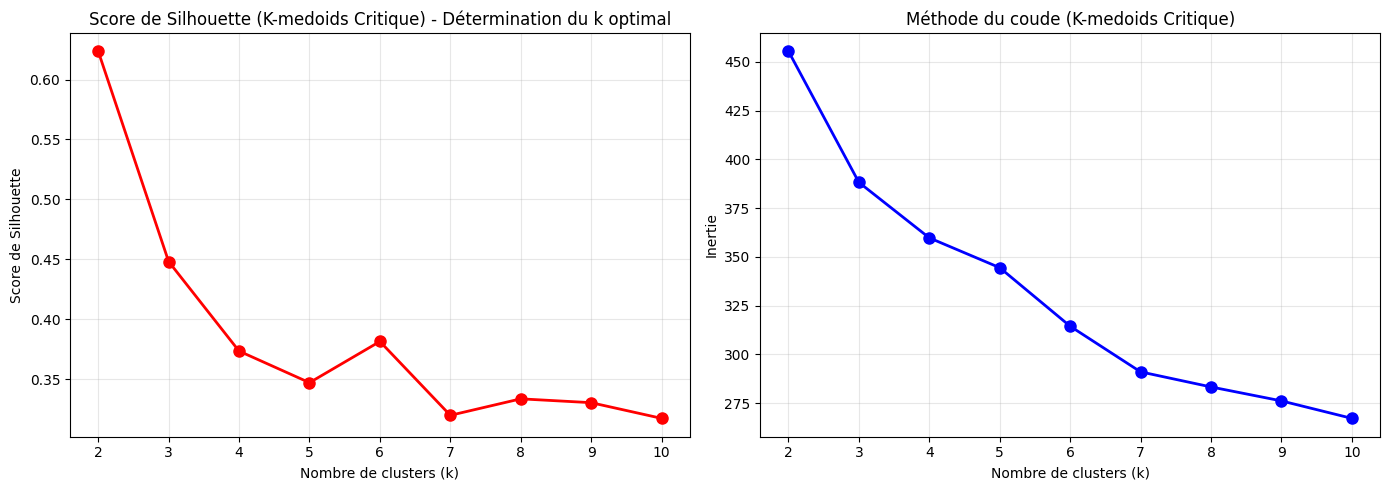


K OPTIMAL POUR LE SUCCÈS CRITIQUE (K-medoids): 2
Score de silhouette: 0.624

ANALYSE DU SUCCÈS CRITIQUE PAR CLUSTER (K-medoids)

--- CLUSTER CRITIQUE 0 (4238 films) ---
Vote Average moyen: 6.03
Vote Average médian: 6.20
Score des autres variables moyen: 0.101
Vote Average normalisé moyen: 0.603

--- CLUSTER CRITIQUE 1 (563 films) ---
Vote Average moyen: 6.60
Vote Average médian: 6.60
Score des autres variables moyen: 0.238
Vote Average normalisé moyen: 0.660

ANALYSE DU SUCCÈS CRITIQUE PAR CLUSTER (K-medoids)

--- CLUSTER CRITIQUE 0 (4238 films) ---
Vote Average moyen: 6.03
Vote Average médian: 6.20
Score des autres variables moyen: 0.101
Vote Average normalisé moyen: 0.603

--- CLUSTER CRITIQUE 1 (563 films) ---
Vote Average moyen: 6.60
Vote Average médian: 6.60
Score des autres variables moyen: 0.238
Vote Average normalisé moyen: 0.660


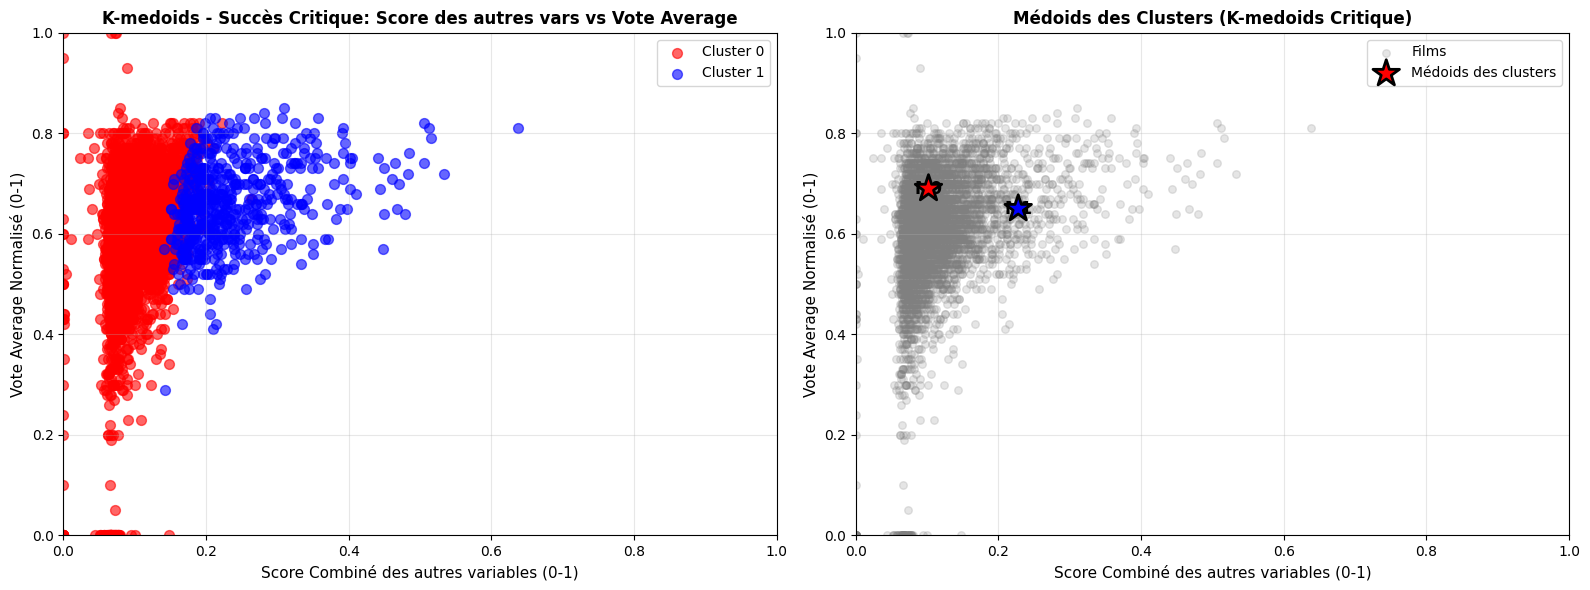


COORDONNÉES NORMALISÉES (0-1) DES MÉDOIDS DES CLUSTERS (K-medoids CRITIQUE)
Médoid 0: X (autres vars)=0.102, Y (vote_average)=0.690
Médoid 1: X (autres vars)=0.228, Y (vote_average)=0.650


In [17]:
#Analyse du succès critique avec K-medoids: vote_average vs score combiné des autres variables

# Variables pour le score critique (toutes sauf vote_average et revenue)
critical_vars = ['budget', 'popularity', 'runtime', 'vote_count']

# Normaliser les variables critiques sur 0-1
scaler_critical_kmedoids = MinMaxScaler(feature_range=(0, 1))
X_critical_normalized_kmedoids = scaler_critical_kmedoids.fit_transform(df_kmedoids[critical_vars])

df_critical_normalized_kmedoids = pd.DataFrame(X_critical_normalized_kmedoids, columns=critical_vars, index=df_kmedoids.index)

# Score combiné des variables critiques (sans vote_average)
df_kmedoids['Score_Critical_Others'] = df_critical_normalized_kmedoids.mean(axis=1)

# Normaliser vote_average sur 0-1
scaler_vote_kmedoids = MinMaxScaler(feature_range=(0, 1))
df_kmedoids['Vote_Average_Normalized'] = scaler_vote_kmedoids.fit_transform(df_kmedoids[['vote_average']])

print("="*60)
print("ANALYSE DU SUCCÈS CRITIQUE (K-medoids)")
print("="*60)

# Calculer la matrice de distance pour les variables critiques
distance_matrix_critical_kmedoids = pairwise_distances(X_critical_normalized_kmedoids, metric='euclidean')

# Trouver le nombre optimal de clusters pour le succès critique avec score de silhouette
silhouette_scores_critical_kmedoids = []
inertias_critical_kmedoids = []
K_range_critical_kmedoids = range(2, 11)

for k in K_range_critical_kmedoids:
    initial_medoids_critical = list(range(k))
    kmed_critical = kmedoids(X_critical_normalized_kmedoids, initial_medoids_critical)
    kmed_critical.process()
    
    clusters_critical = kmed_critical.get_clusters()
    medoids_critical = kmed_critical.get_medoids()
    
    # Construire les labels
    labels_critical = np.zeros(len(X_critical_normalized_kmedoids), dtype=int)
    for idx_cluster, points in enumerate(clusters_critical):
        for p in points:
            labels_critical[p] = idx_cluster
    
    silhouette_avg_critical = silhouette_score(X_critical_normalized_kmedoids, labels_critical)
    silhouette_scores_critical_kmedoids.append(silhouette_avg_critical)
    
    # Calculer l'inertie
    inertia = sum([distance_matrix_critical_kmedoids[i, medoids_critical[labels_critical[i]]] for i in range(len(labels_critical))])
    inertias_critical_kmedoids.append(inertia)
    print(f"k={k}: Silhouette Score = {silhouette_avg_critical:.3f}, Inertie = {inertia:.2f}")

# Afficher les graphiques de sélection du k optimal
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range_critical_kmedoids, silhouette_scores_critical_kmedoids, 'ro-', linewidth=2, markersize=8)
axes[0].set_xlabel('Nombre de clusters (k)')
axes[0].set_ylabel('Score de Silhouette')
axes[0].set_title('Score de Silhouette (K-medoids Critique) - Détermination du k optimal')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range_critical_kmedoids, inertias_critical_kmedoids, 'bo-', linewidth=2, markersize=8)
axes[1].set_xlabel('Nombre de clusters (k)')
axes[1].set_ylabel('Inertie')
axes[1].set_title('Méthode du coude (K-medoids Critique)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Sélectionner le k optimal pour le succès critique
k_optimal_critical_kmedoids = K_range_critical_kmedoids[np.argmax(silhouette_scores_critical_kmedoids)]
print(f"\n{'='*60}")
print(f"K OPTIMAL POUR LE SUCCÈS CRITIQUE (K-medoids): {k_optimal_critical_kmedoids}")
print(f"Score de silhouette: {max(silhouette_scores_critical_kmedoids):.3f}")
print(f"{'='*60}")

# Appliquer K-medoids avec k optimal pour le succès critique
initial_medoids_critical_final = list(range(k_optimal_critical_kmedoids))
kmed_critical_final = kmedoids(X_critical_normalized_kmedoids, initial_medoids_critical_final)
kmed_critical_final.process()

clusters_critical_final = kmed_critical_final.get_clusters()
medoids_critical_final = kmed_critical_final.get_medoids()

# Construire les labels
df_kmedoids['Cluster_Critical'] = np.zeros(len(df_kmedoids), dtype=int)
for idx_cluster, points in enumerate(clusters_critical_final):
    for p in points:
        df_kmedoids.iloc[p, df_kmedoids.columns.get_loc('Cluster_Critical')] = idx_cluster

# Analyser les clusters par succès critique
print("\nANALYSE DU SUCCÈS CRITIQUE PAR CLUSTER (K-medoids)")

for cluster in range(k_optimal_critical_kmedoids):
    cluster_data = df_kmedoids[df_kmedoids['Cluster_Critical'] == cluster]
    print(f"\n--- CLUSTER CRITIQUE {cluster} ({len(cluster_data)} films) ---")
    print(f"Vote Average moyen: {cluster_data['vote_average'].mean():.2f}")
    print(f"Vote Average médian: {cluster_data['vote_average'].median():.2f}")
    print(f"Score des autres variables moyen: {cluster_data['Score_Critical_Others'].mean():.3f}")
    print(f"Vote Average normalisé moyen: {cluster_data['Vote_Average_Normalized'].mean():.3f}")

# GRAPHIQUES: Score des autres variables (X) vs Vote Average Normalisé (Y)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Tous les points colorés par cluster critique
colors_critical = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster in range(k_optimal_critical_kmedoids):
    cluster_data = df_kmedoids[df_kmedoids['Cluster_Critical'] == cluster]
    axes[0].scatter(cluster_data['Score_Critical_Others'], 
                    cluster_data['Vote_Average_Normalized'],
                    label=f'Cluster {cluster}', 
                    s=50, alpha=0.6, c=colors_critical[cluster % len(colors_critical)])

axes[0].set_xlabel('Score Combiné des autres variables (0-1)', fontsize=11)
axes[0].set_ylabel('Vote Average Normalisé (0-1)', fontsize=11)
axes[0].set_title('K-medoids - Succès Critique: Score des autres vars vs Vote Average', fontsize=12, fontweight='bold')
axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Graphique 2: Médoids des clusters critiques
medoids_critical_others = []
medoids_vote_avg = []

for medoid_idx in medoids_critical_final:
    medoids_critical_others.append(df_kmedoids.iloc[medoid_idx]['Score_Critical_Others'])
    medoids_vote_avg.append(df_kmedoids.iloc[medoid_idx]['Vote_Average_Normalized'])

# Afficher tous les points en gris clair
axes[1].scatter(df_kmedoids['Score_Critical_Others'], 
                df_kmedoids['Vote_Average_Normalized'],
                s=30, alpha=0.2, c='gray', label='Films')

# Afficher les médoids des clusters en gros
axes[1].scatter(medoids_critical_others, medoids_vote_avg, 
                s=400, marker='*', c=colors_critical[:k_optimal_critical_kmedoids], 
                edgecolors='black', linewidth=2, label='Médoids des clusters', zorder=5)

# Ajouter les labels des clusters au médoid
for i, (x, y) in enumerate(zip(medoids_critical_others, medoids_vote_avg)):
    axes[1].annotate(f'M{i}', (x, y), fontsize=12, fontweight='bold', 
                     ha='center', va='center')

axes[1].set_xlabel('Score Combiné des autres variables (0-1)', fontsize=11)
axes[1].set_ylabel('Vote Average Normalisé (0-1)', fontsize=11)
axes[1].set_title('Médoids des Clusters (K-medoids Critique)', fontsize=12, fontweight='bold')
axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

# Afficher les coordonnées normalisées des médoids
print("\n" + "="*60)
print("COORDONNÉES NORMALISÉES (0-1) DES MÉDOIDS DES CLUSTERS (K-medoids CRITIQUE)")
print("="*60)
for i, (others, vote) in enumerate(zip(medoids_critical_others, medoids_vote_avg)):
    print(f"Médoid {i}: X (autres vars)={others:.3f}, Y (vote_average)={vote:.3f}")